## #7DaysOfCode 1de7 - Cota para Exercício da Atividade Parlamentar dos Senadores
------------

Esse é meu trabalho desenvolvido para o projeto 7 Days of Code organizado pela GitHub Brasil e diversos professores voluntários com o intuito de ajudar os interessados a desenvolverem um projeto para a vida real usando dados públicos.

Análise realizada por Vinícius Nunes Rebeque em Agosto/2022 <br>
Visite meu LinkedIn: https://www.linkedin.com/in/vrebeque/ <br>
Explore meu GitHub: https://github.com/Rebeque

-----------

#### Dia 1/7 - Meu desafio é trabalhar com os dados do CEAPS que são as cotas parlamentares dos Senadores
Esses dados são atualizados anualmente e estão disponíveis os períodos entre 2008 e 2022 <br>
https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps

##### Passo 1 - Unir todos os conjuntos de dados anuais em um único dataset gigante

Eu poderia ter automatizado o processo de extração e tratamento dos dados, porém, ao abrir o primeiro e o segundo dataset notei que não seria possível já que o índice estava com dados temporais na coluna "Última atualização". Logo a solução que eu encontrei foi obter todos os datasets primeiro para depois concatená-los com uma indexação padronizada.

Para concatenar todos os arquivos CSV usei como referência esse tutorial: <br>
https://www.geeksforgeeks.org/how-to-merge-multiple-csv-files-into-a-single-pandas-dataframe/

Toda a extração e transformação dos dados foi feita através da biblioteca Pandas.

In [1]:
# Importação e alias das bibliotecas Python necessárias

import pandas as pd
import matplotlib.pyplot as plt
import pandas, numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(16,5)})
sns.set_style("darkgrid")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Leitura dos arquivo CSV de 2008

df2008 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2008.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2008.reset_index(drop=False, inplace=True)

df2008.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:00': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2008.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2008.reset_index(drop=True, inplace=True)

# Exibe as primeiras linhas do dataset para verificar se está tudo conforme.

df2008.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2008090814004
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"386,6",2008090814003
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2008100814004
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"2610,68",2008100814003
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2008110814004


-------
#### Farei o mesmo tratamento dos dados com os próximos arquivos CSV inserindo cada um em um objeto Python para futura concatenação em um único dataframe. 


    
### [Clique aqui para ser direcionado para a etapa de concatenação.](#concatena)
   



-------

In [3]:
# Leitura dos arquivo CSV de 2009

df2009 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2009.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2009.reset_index(drop=False, inplace=True)

df2009.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:00': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2009.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2009.reset_index(drop=True, inplace=True)

In [4]:
# Leitura dos arquivo CSV de 2010

df2010 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2010.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2010.reset_index(drop=False, inplace=True)

df2010.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:00': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2010.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2010.reset_index(drop=True, inplace=True)

In [5]:
# Leitura dos arquivo CSV de 2011

df2011 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2011.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2011.reset_index(drop=False, inplace=True)

df2011.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:00': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2011.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2011.reset_index(drop=True, inplace=True)

In [6]:
# Leitura dos arquivo CSV de 2012

df2012 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2012.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2012.reset_index(drop=False, inplace=True)

df2012.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:01': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2012.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2012.reset_index(drop=True, inplace=True)

In [7]:
# Leitura dos arquivo CSV de 2013

df2013 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2013.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2013.reset_index(drop=False, inplace=True)

df2013.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:01': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2013.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2013.reset_index(drop=True, inplace=True)

In [8]:
# Leitura dos arquivo CSV de 2014

df2014 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2014.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2014.reset_index(drop=False, inplace=True)

df2014.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:01': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2014.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2014.reset_index(drop=True, inplace=True)

In [9]:
# Leitura dos arquivo CSV de 2015

df2015 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2015.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2015.reset_index(drop=False, inplace=True)

df2015.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:01': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2015.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2015.reset_index(drop=True, inplace=True)

In [10]:
# Leitura dos arquivo CSV de 2016

df2016 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2016.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2016.reset_index(drop=False, inplace=True)

df2016.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:03': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2016.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2016.reset_index(drop=True, inplace=True)

In [11]:
# Leitura dos arquivo CSV de 2017

df2017 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2017.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2017.reset_index(drop=False, inplace=True)

df2017.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:05': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2017.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2017.reset_index(drop=True, inplace=True)

In [12]:
# Leitura dos arquivo CSV de 2018

df2018 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2018.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2018.reset_index(drop=False, inplace=True)

df2018.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:06': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2018.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2018.reset_index(drop=True, inplace=True)

In [13]:
# Leitura dos arquivo CSV de 2019

df2019 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2019.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2019.reset_index(drop=False, inplace=True)

df2019.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '06/08/2021 02:08': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2019.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2019.reset_index(drop=True, inplace=True)

In [14]:
# Leitura dos arquivo CSV de 2020

df2020 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2020.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2020.reset_index(drop=False, inplace=True)

df2020.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '02/08/2022 02:00': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2020.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2020.reset_index(drop=True, inplace=True)

In [15]:
# Leitura dos arquivo CSV de 2021

df2021 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2021.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2021.reset_index(drop=False, inplace=True)

df2021.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '02/08/2022 02:01': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2021.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2021.reset_index(drop=True, inplace=True)


In [16]:
# Leitura dos arquivo CSV de 2022

df2022 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2022.csv', 
                     encoding='latin-1', sep=';', decimal=',')

# Tratamento do índice (veio fora de ordem com multi indexação)
df2022.reset_index(drop=False, inplace=True)

df2022.rename(columns={'level_0': 'ANO', 
                       'level_1': 'MES', 
                       'level_2': 'SENADOR', 
                       'level_3': 'TIPO_DESPESA', 
                       'level_4': 'CNPJ_CPF', 
                       'level_3': 'TIPO_DESPESA',    
                       'level_5': 'FORNECEDOR', 
                       'level_6': 'DOCUMENTO', 
                       'level_7': 'DATA', 
                       'level_8': 'DETALHAMENTO', 
                       'ULTIMA ATUALIZACAO': 'VALOR_REEMBOLSADO',    
                       '02/08/2022 02:01': 'COD_DOCUMENTO'},                 
                       inplace=True)

# Remoção da primeira linha pois essa não continha dados e sim cabeçalhos que não eram colunas nem metadados

df2022.drop([0], axis=0, inplace=True)

# Resetando o contador do índice

df2022.reset_index(drop=True, inplace=True)

<a id='concatena'></a>

In [17]:
# Concatenação de todos os dataframes no período disponível

df = pd.concat([df2008, df2009, df2010, df2011, df2012,
                df2013, df2014, df2015, df2016, df2017,
                df2018, df2019, df2020, df2021, df2022], axis=0)




df.reset_index(drop=True, inplace=True)

df.info()

# Aqui estão algumas informações sobre nosso dataframe:
# Temos 310456 entradas, 11 colunas. Bastante valores ausentes nas colunas DETALHAMENTO e DOCUMENTO.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310478 entries, 0 to 310477
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ANO                310478 non-null  object
 1   MES                310478 non-null  object
 2   SENADOR            310478 non-null  object
 3   TIPO_DESPESA       310478 non-null  object
 4   CNPJ_CPF           307334 non-null  object
 5   FORNECEDOR         307334 non-null  object
 6   DOCUMENTO          286104 non-null  object
 7   DATA               307334 non-null  object
 8   DETALHAMENTO       176524 non-null  object
 9   VALOR_REEMBOLSADO  310478 non-null  object
 10  COD_DOCUMENTO      270262 non-null  object
 11  03/08/2022 02:00   30917 non-null   object
 12  03/08/2022 02:01   9297 non-null    object
dtypes: object(13)
memory usage: 30.8+ MB


In [18]:
# Exportando para um arquivo CSV local para evitar perda do código numa futura atualização nas colunas como reportado no início

compressão_df = dict(method='zip', archive_name='df_unificado_CEAPS.csv')
df.to_csv('df_unificado_CEAPS.zip', index=True, compression=compressão_df, encoding='latin-1', sep=';', decimal=',')

In [19]:
# Importação do arquivo local para evitar alterações com a atualização dos dados
# Usei alguns argumentos a mais para evitar warnings já que nas próximas linhas já vou alterar corretamente os dtypes.

df = pd.read_csv('df_unificado_CEAPS.csv', encoding='latin-1', sep=';', decimal=',', index_col=0, dtype={'VALOR_REEMBOLSADO': object, 'COD_DOCUMENTO': object})

##### Passo 2 - Tratamento dos dados

In [20]:
# Eliminando uma linha com valor de reembolso incorreto (contendo letras e caracteres especiais)

df[df.eq("1\r\n675.55").any(1)]      # Esse valor estava no coluna Valor Reembolsado na linha 115962
print(df.loc[[115962]])              # Verificando se era essa linha mesmo com defeito
df.drop(115962, inplace=True)        # Deletando linha problemática

# Resetando contagem do índice depois de remover uma linha
df.reset_index(drop=True, inplace=True)

         ANO  MES          SENADOR  \
115962  2013    2  RICARDO FERRAÇO   

                                             TIPO_DESPESA            CNPJ_CPF  \
115962  Passagens aéreas, aquáticas e terrestres nacio...  02.012.862/0001-60   

       FORNECEDOR      DOCUMENTO        DATA  \
115962        TAM  9572462859757  04/02/2013   

                                             DETALHAMENTO VALOR_REEMBOLSADO  \
115962  CNPJ: 02.012.862/0001-60 FORNECEDOR: TAM DOCUM...       1\r\n675,55   

       COD_DOCUMENTO  
115962        698982  


In [21]:
# Verificar erros nas colunas DATA e VALOR_REEMBOLSADO (descobri esses erros durante a análise exploratória)

df.sort_values(by='DATA', ascending=False)
df.drop(150216, inplace=True) 
df.drop(150210, inplace=True) 

# Para ganhar tempo resolvi descartar esses dois registros mas o correto seria alterar manualmente

In [22]:
# List Comprehension para trocar vírgula por ponto nos valores decimais. O argumento decimal no read_csv não deu certo

df['VALOR_REEMBOLSADO'] = [x.replace(',', '.') for x in df['VALOR_REEMBOLSADO']]
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].astype(float)
df['ANO'] = df['ANO'].astype('int32')   

print(df.dtypes)

ANO                    int32
MES                    int64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO    float64
COD_DOCUMENTO         object
dtype: object


In [23]:
# Verificando anomalias na coluna VALOR_REEMBOLSADO

df.sort_values(by='VALOR_REEMBOLSADO', ascending=True)

# Nossos amados Senadores preencheram valores negativos em algumas células. 
# Vou removê-las já que nem todos colocaram o valor real no detalhamento.
# São mais valores com 0.01 do que eu esperava. Vou automatizar o processo por meio de uma linha de código.

df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'][df.VALOR_REEMBOLSADO.notnull()] # Removendo linhas em branco
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'][df.VALOR_REEMBOLSADO != 0.01]  

# Removendo valores falsos com 0.01, 0.02, 0.03 etc.

df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'][df.VALOR_REEMBOLSADO > 1.00]

# Filtrei todos os valores inferiores a 1 real já que tinhamos vários registros com valores falsos de 1 centavo, 2 centavos etc.

In [24]:
# Resetando contagem do índice depois das alterações
df.reset_index(drop=True, inplace=True)

In [25]:
# Visualizando a estrutura geral dos dados nos registros mais recentes (estão mais completos)
df.tail(2)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
310473,2022,7,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,KPRGXR,08/07/2022,"Companhia Aérea: GOL, Localizador: KPRGXR. Pas...",2944.06,2183750
310474,2022,7,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,EWEXLJ,11/07/2022,"Companhia Aérea: LATAM, Localizador: EWEXLJ. P...",2532.14,2183747


##### Passo 3 - Análise exploratória

In [26]:
# Qual o valor reembolsado por ano?

soma_ano = df.groupby('ANO')['VALOR_REEMBOLSADO'].sum()

print(soma_ano)

ANO
2008    11575947.40
2009    11731884.44
2010    10760008.92
2011    19004500.73
2012    23354739.37
2013    24657269.78
2014    22519389.56
2015    28891067.94
2016    25301955.83
2017    26673083.09
2018    25604700.52
2019    25248240.46
2020    20414921.20
2021    25020320.92
2022    14171277.32
Name: VALOR_REEMBOLSADO, dtype: float64


([<matplotlib.axis.XTick at 0x1f47c249820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

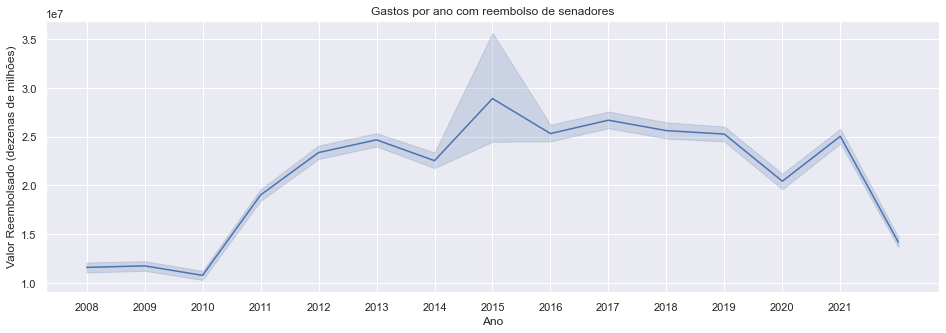

In [27]:
# Visualização dos gastos por ano em um gráfico de linhas

sns.lineplot(x=df.ANO, y=df.VALOR_REEMBOLSADO, estimator=sum)
plt.xlabel('Ano')
plt.ylabel('Valor Reembolsado (dezenas de milhões)')
plt.title('Gastos por ano com reembolso de senadores')
plt.xticks(range(2008,2022)) #range para mostrar todos os anos no gráfico de linha

In [28]:
# Quais são os top 10 senadores que mais gastaram em todo o período?

df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

SENADOR
EDUARDO AMORIM     6227809.30
SÉRGIO PETECÃO     5012065.93
FERNANDO COLLOR    5010057.96
CIRO NOGUEIRA      4579716.96
HUMBERTO COSTA     4457024.77
                      ...    
IONE GUIMARÃES       11379.91
WIRLANDE DA LUZ      11298.25
SIQUEIRA CAMPOS       5926.99
GILBERTO PISELO       3923.04
NAILDE PANTA          1650.62
Name: VALOR_REEMBOLSADO, Length: 283, dtype: float64

Text(0.5, 0, 'Senador')

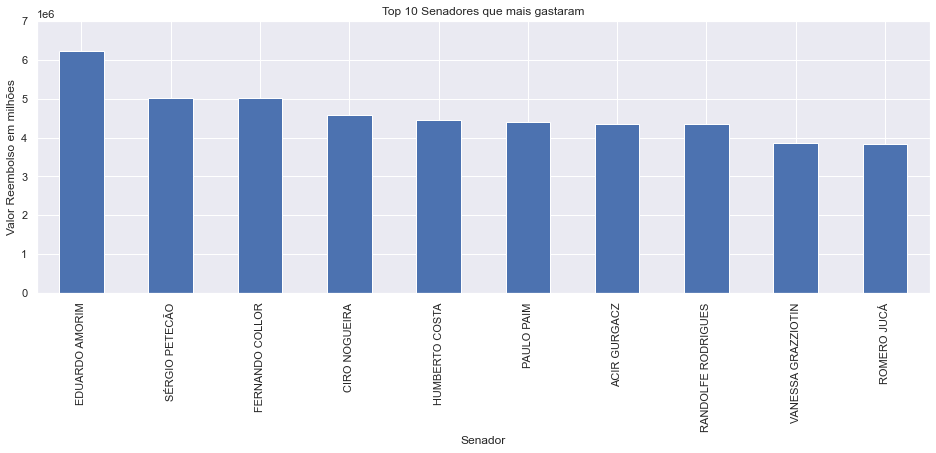

In [29]:
plt.figure()
ax = plt.axes()
ax.set_ylim([0, 7000000])
df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 Senadores que mais gastaram')
plt.ylabel('Valor Reembolso em milhões')
plt.xlabel('Senador')

#### Quanto da cota cada parlamentar gastou? 

Para responder essa pergunta teremos que conhecer as regras. Cada estado tem um valor diferente de cota parlamentar mas o valor entre elas não é tão distante uma das outras, podemos tirar uma média.

In [30]:
# Criando um dataframe de cotas por estado

cotas = {'AC':[44632.46], 'AL':[40944.10], 'AM':[43570.12], 'AP':[43374.78], 'BA':[39010.85], 'CE':[42451.77], 
         'DF':[30788.66], 'ES':[37423.91], 'GO':[35507.06], 'MA':[42151.69], 'MG':[36092.71], 'MS':[40542.84], 
         'MT':[39428.03], 'PA':[42227.45], 'PB':[42032.56], 'PE':[41676.80], 'PI':[40971.77], 'PR':[38871.86], 
         'RJ':[35759.97], 'RN':[42731.99], 'RO':[43672.49], 'RR':[45612.53], 'RS':[40875.90], 'SC':[39877.78], 
         'SE':[40139.26], 'SP':[37043.53], 'TO':[39503.61]}

cotasframe = pd.DataFrame(data=cotas)

cotasframe['Média'] = cotasframe.mean(axis=1)
cotasframe['Média'].head()

# A média de CEAP no Brasil é de 40256.17 reais.

0    40256.165926
Name: Média, dtype: float64

O dicionário acima foi criado á partir das informações contidas no site oficial: 

https://www2.camara.leg.br/comunicacao/assessoria-de-imprensa/guia-para-jornalistas/cota-parlamentar

Como vimos durante os cálculos da média desse dicionário o valor mensal de Cota Parlamentar que nossos senadores tem por mês é de 40256,17 reais.

Vamos transformar essa informação em uma coluna e verificar quantos por cento dela cada senador consumiu anualmente (x12).

In [86]:
# Selecionando colunas interessantes para a resolução

df_subset = df.loc[:, ['SENADOR', 'ANO', 'VALOR_REEMBOLSADO']]   

# Agregando o valor reembolsado por ano 

df_pivot = df_subset.pivot_table('VALOR_REEMBOLSADO', ['ANO', 'SENADOR'], aggfunc='sum').reset_index()

# Criando o objeto com o valor máximo de gasto da CEAP

gastomax = (40256.17*12)  

# Criando a coluna de gasto máximo em porcentagem

df_pivot['%GASTO_CEAP'] = ((df_pivot['VALOR_REEMBOLSADO']*100)/gastomax).round(2)

# Garantindo que a nova coluna está em formato numérico para plotagem

pd.to_numeric(df_pivot2021['%GASTO_CEAP'])

# Resultado

df_pivot

,ANO,SENADOR,VALOR_REEMBOLSADO,%GASTO_CEAP
0,2008,ADA MELLO,59962.46,12.41
1,2008,ADELMIR SANTANA,163612.32,33.87
2,2008,ALMEIDA LIMA,166026.66,34.37
3,2008,ALOIZIO MERCADANTE,161579.34,33.45
4,2008,ALVARO DIAS,116287.62,24.07
...,...,...,...,...
1389,2022,VENEZIANO VITAL DO RÊGO,140620.96,29.11
1390,2022,WELLINGTON FAGUNDES,166369.78,34.44
1391,2022,WEVERTON ROCHA,229764.16,47.56
1392,2022,ZENAIDE MAIA,197866.83,40.96


In [94]:
# Quais os 10 senadores que chegaram mais perto de esgotar sua cota em 2021?

# Separando as colunas que nos interessam

df_pivot2021 = df_pivot[df_pivot.ANO == 2021].sort_values(by=['%GASTO_CEAP'], ascending=False)

# Agregando e ordenando

df_pivot2021.pivot_table('SENADOR', ['%GASTO_CEAP'], aggfunc='sum').reset_index().sort_values(by='%GASTO_CEAP', ascending=False)

,%GASTO_CEAP,SENADOR
85,109.23,OMAR AZIZ
84,106.11,DAVI ALCOLUMBRE
83,103.95,ROGÉRIO CARVALHO
82,103.32,LUCAS BARRETO
81,101.16,MECIAS DE JESUS
...,...,...
4,5.64,ALVARO DIAS
3,3.70,EDUARDO GIRÃO
2,1.97,NEY SUASSUNA
1,1.18,VIRGINIO DE CARVALHO


<AxesSubplot:xlabel='%GASTO_CEAP', ylabel='SENADOR'>

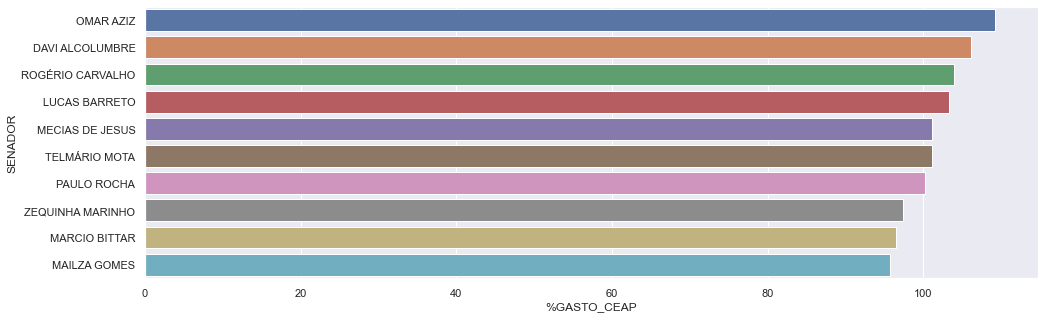

In [93]:
# Gerando a visualização

dadosplot = df_pivot2021.pivot_table('%GASTO_CEAP', ['SENADOR'], aggfunc='sum').reset_index().sort_values(by='%GASTO_CEAP', ascending=False).head(10)

sns.barplot(data=dadosplot, x='%GASTO_CEAP', y='SENADOR')

Alguns senadores até ultrapassaram a cota máxima. Será que houve algum processo jurídico?

<AxesSubplot:xlabel='%GASTO_CEAP', ylabel='SENADOR'>

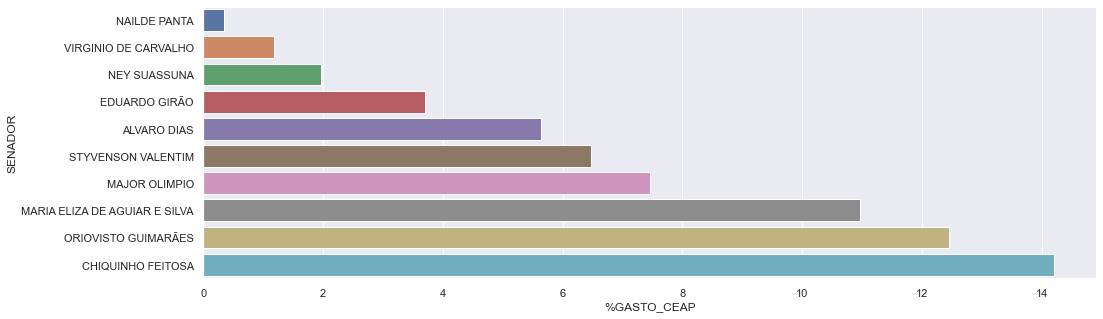

In [95]:
# E quais os senadores em 2021 que menos usaram sua cota máxima CEAP?

dadosplot = df_pivot2021.pivot_table('%GASTO_CEAP', ['SENADOR'], aggfunc='sum').reset_index().sort_values(by='%GASTO_CEAP', ascending=True).head(10)

sns.barplot(data=dadosplot, x='%GASTO_CEAP', y='SENADOR')

Será que esses senadores que menos gastaram ficaram o ano letivo inteiro no cargo? Uma breve pesquisa no Google e notei que não. A top 1 por exemplo ficou um mês no cargo. Já o top 4 Eduardo Girão é senador consecutivamente desde 2019. 

#### Com esse subconjunto dos nossos dados podemos responder mais algumas perguntas como: em ano de eleições os senadores gastam mais?

As eleições acontecem de 4 em 4 anos e esse ano (2022) é ano de eleições então vamos criar uma coluna com verdadeiro ou falso para ano de eleição e depois comparar entre elas qual gerou mais gastos na CEAP.

In [115]:
# Partindo do nosso primeiro pivot df_pivot

# Guardando os anos de eleição em uma lista
anoseleicao = [2022, 2018, 2016, 2012, 2008]

# Criando a coluna de eleição

df_pivot['ELEICAO'] = df_pivot['ANO'].isin(anoseleicao)

df_pivot

,ANO,SENADOR,VALOR_REEMBOLSADO,%GASTO_CEAP,ELEICAO
0,2008,ADA MELLO,59962.46,12.41,True
1,2008,ADELMIR SANTANA,163612.32,33.87,True
2,2008,ALMEIDA LIMA,166026.66,34.37,True
3,2008,ALOIZIO MERCADANTE,161579.34,33.45,True
4,2008,ALVARO DIAS,116287.62,24.07,True
...,...,...,...,...,...
1389,2022,VENEZIANO VITAL DO RÊGO,140620.96,29.11,True
1390,2022,WELLINGTON FAGUNDES,166369.78,34.44,True
1391,2022,WEVERTON ROCHA,229764.16,47.56,True
1392,2022,ZENAIDE MAIA,197866.83,40.96,True


In [124]:
# Testando se deu certo

# Teve eleições em 2009? 
print('Teve eleições em 2009? ')
print(df_pivot.query('ANO == 2009').head(2))

# E em 2008? 
print('\nE em 2008?')
print(df_pivot.query('ANO == 2008').head(2))

Teve eleições em 2009? 
     ANO          SENADOR  VALOR_REEMBOLSADO  %GASTO_CEAP  ELEICAO
85  2009     ACIR GURGACZ           17620.00         3.65    False
86  2009  ADELMIR SANTANA          178174.44        36.88    False

E em 2008?
    ANO          SENADOR  VALOR_REEMBOLSADO  %GASTO_CEAP  ELEICAO
0  2008        ADA MELLO           59962.46        12.41     True
1  2008  ADELMIR SANTANA          163612.32        33.87     True


In [133]:
# Vamos agrupar a coluna recém criada e gerar uma análise de soma

df_pivot.groupby('ELEICAO')['VALOR_REEMBOLSADO'].sum()

ELEICAO
False    2.149207e+08
True     1.000086e+08
Name: VALOR_REEMBOLSADO, dtype: float64

<AxesSubplot:xlabel='ELEICAO'>

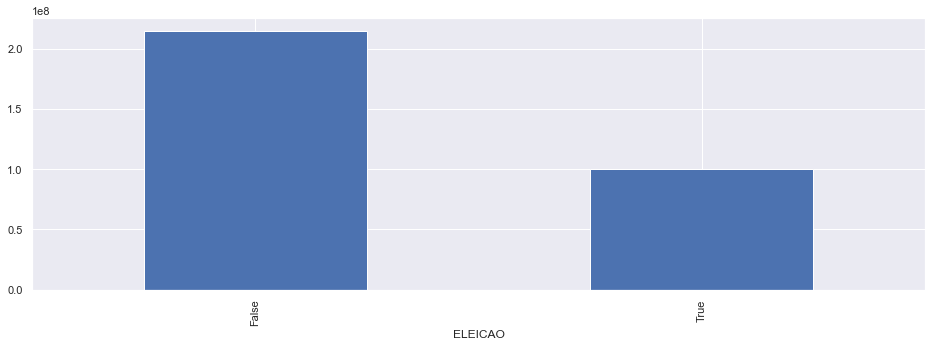

In [134]:
# Plotando

df_pivot.groupby('ELEICAO')['VALOR_REEMBOLSADO'].sum().plot(kind='bar')

Diferente do que eu havia pensado no ano de eleição NÃO há mais gasto do que no resto do mandato. 

#### E essas foram algumas das possíveis análises nos dados de CEAP dos senadores brasileiros nesse período. Espero que tenha gostado. Não esqueça de marcar como 'Star' no meu GitHub e curtir o post do LinkedIn. 

#### Na próxima etapa do desafio GitHub vou criar as visualizações usando um software de dashboards, o PowerBI.